In [1]:
# Assignment 5
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 08.10.2019

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [12]:
#Constants
#Size of trajectory
c = 200
#Initial conditions
x1 = 5
v1 = 1
t = 1
#Variance of acceleration noise
sa = 0.2
sa2 = 1
s2a = sa**2
s2a2 = sa2**2

#acceleration
a = np.random.normal(0,sa,c)
a2 = np.random.normal(0,sa2,c)

In [13]:
#2 Generating measurements
#Variance
sn = 20
s2n = sn**2
n = np.random.normal(0,sn,c)

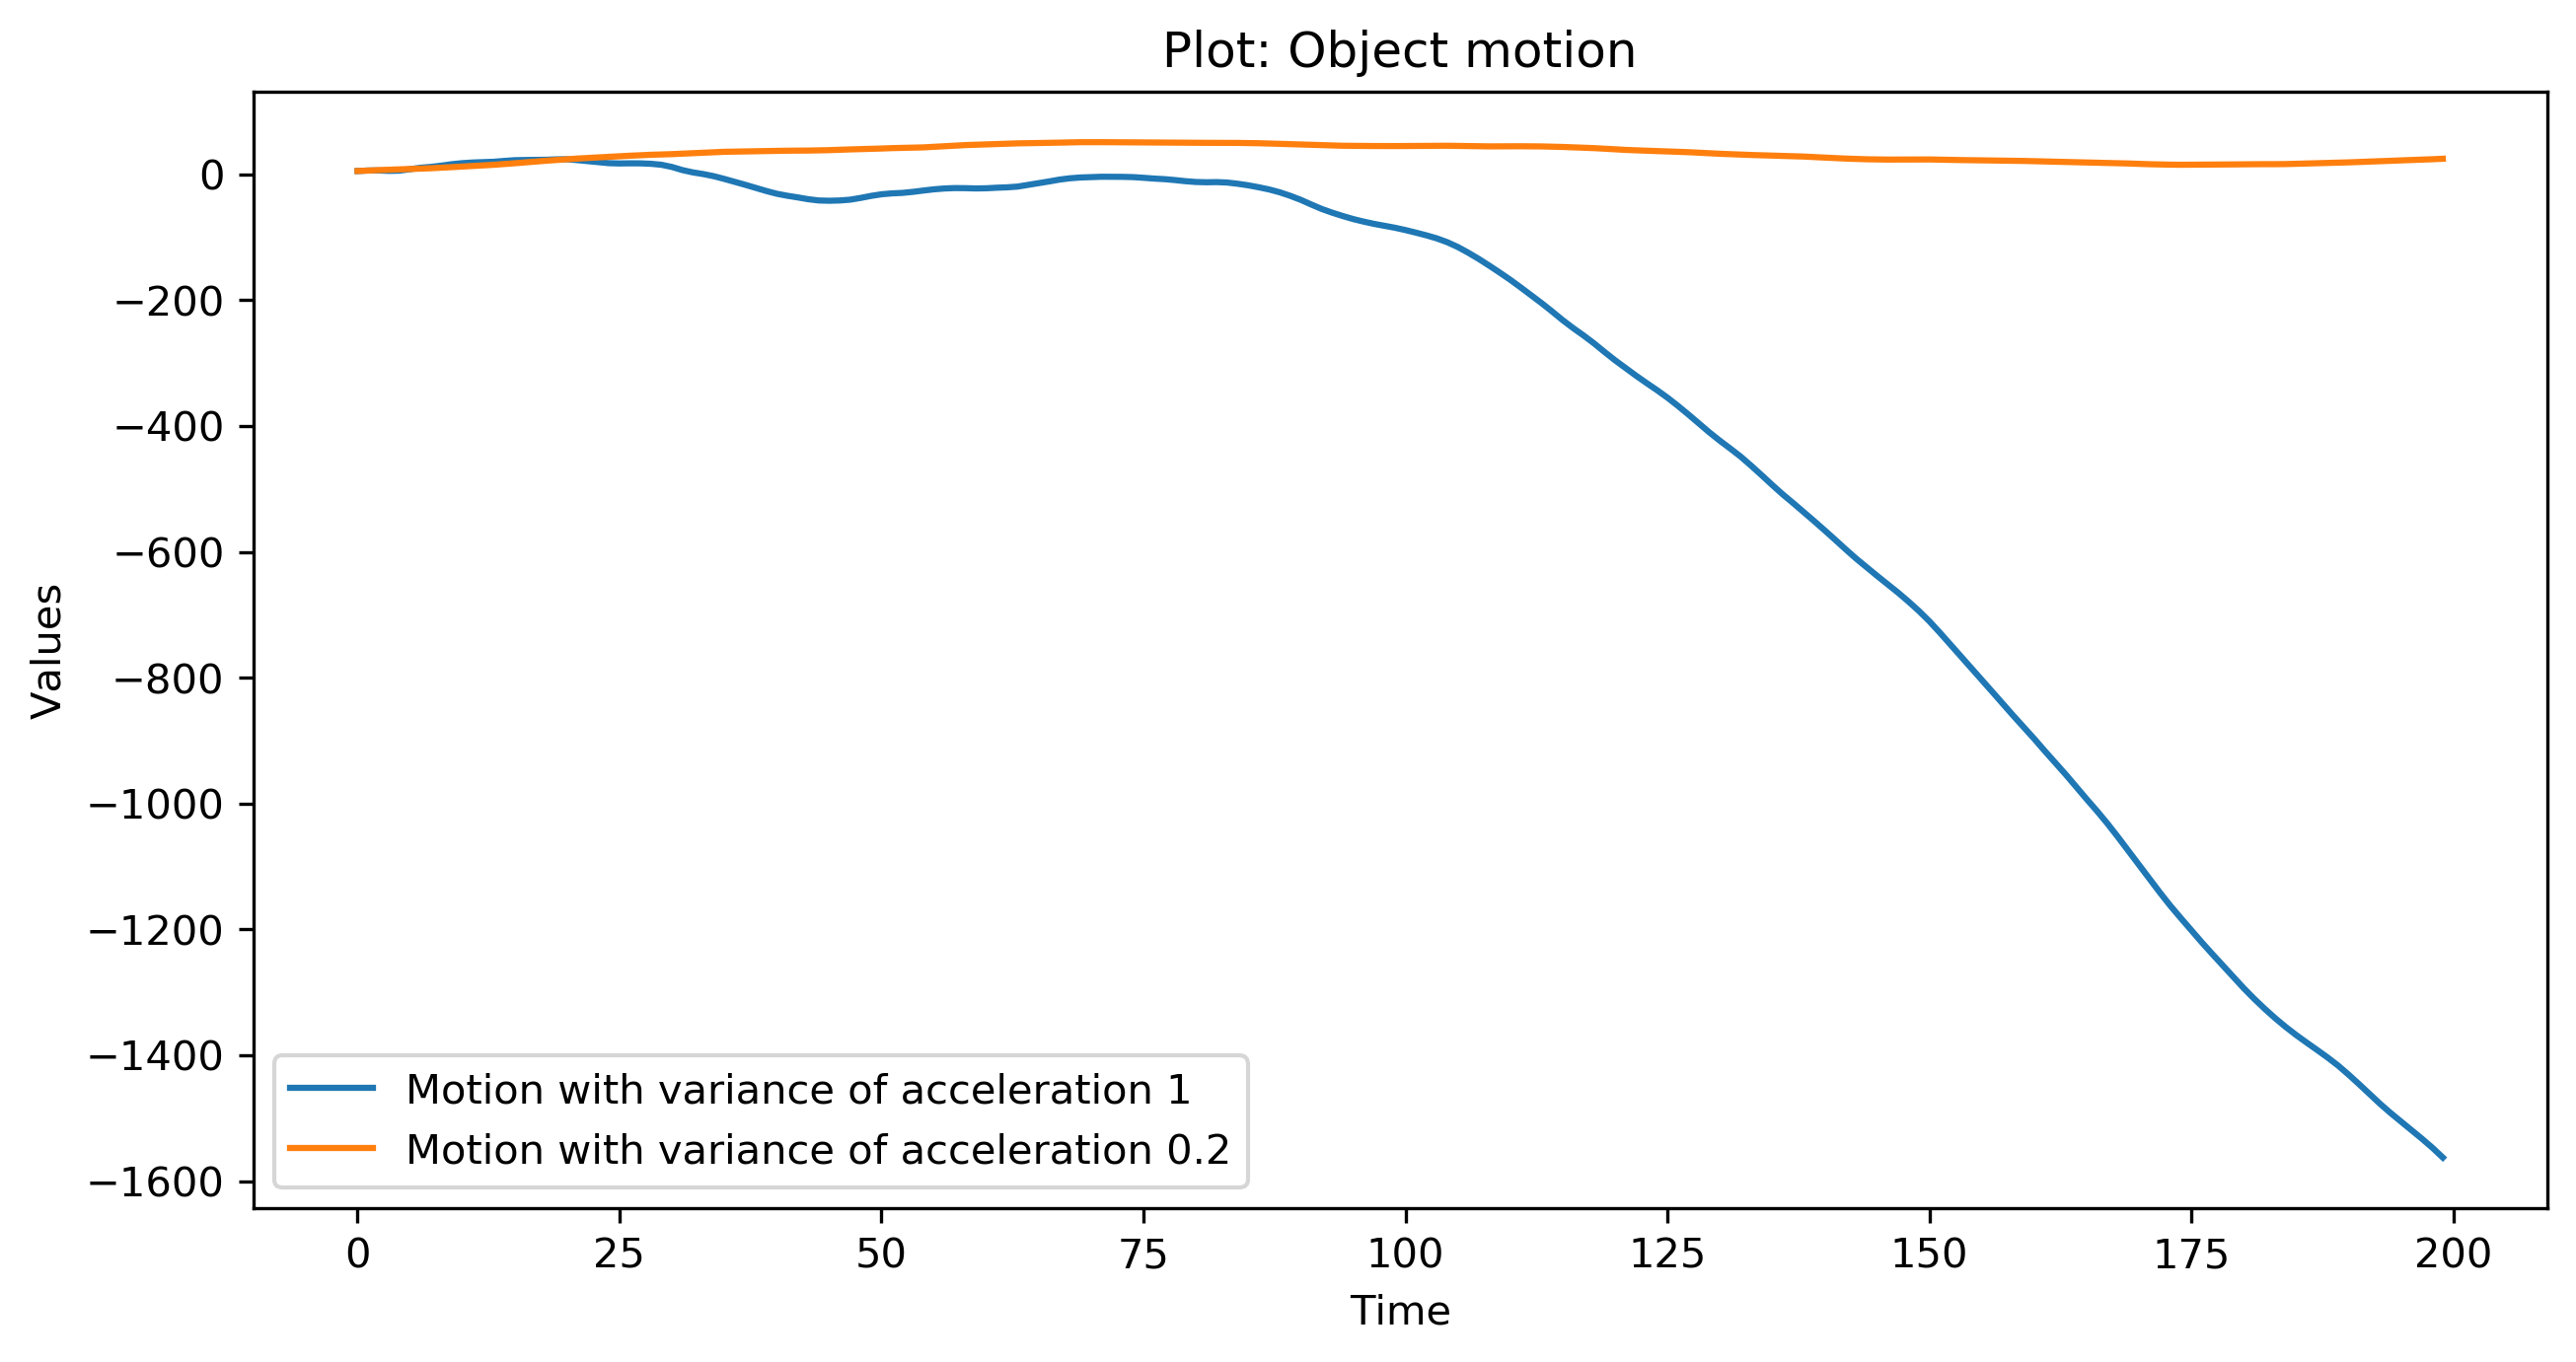

In [14]:
#3 Presenting state equation
X1 = np.matrix((5,1))
F = np.matrix(((1,t),(0,1)))
G = np.matrix((t**2/2,t)).T
H = np.matrix((1,0))

X = np.zeros([c,2])
X[0] = X1
for i in range (1,c):
    frst = np.matmul(F,np.asmatrix(X[i-1]).T)
    scnd = G.dot(a[i-1])
    X[i] = np.add(frst,scnd).T

X2 = np.zeros([c,2])
X2[0] = X1
for i in range (1,c):
    frst = np.matmul(F,np.asmatrix(X2[i-1]).T)
    scnd = G.dot(a2[i-1])
    X2[i] = np.add(frst,scnd).T    
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion')    
plt.plot(X2.T[0], label='Motion with variance of acceleration 1')
plt.plot(X.T[0], label='Motion with variance of acceleration 0.2')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

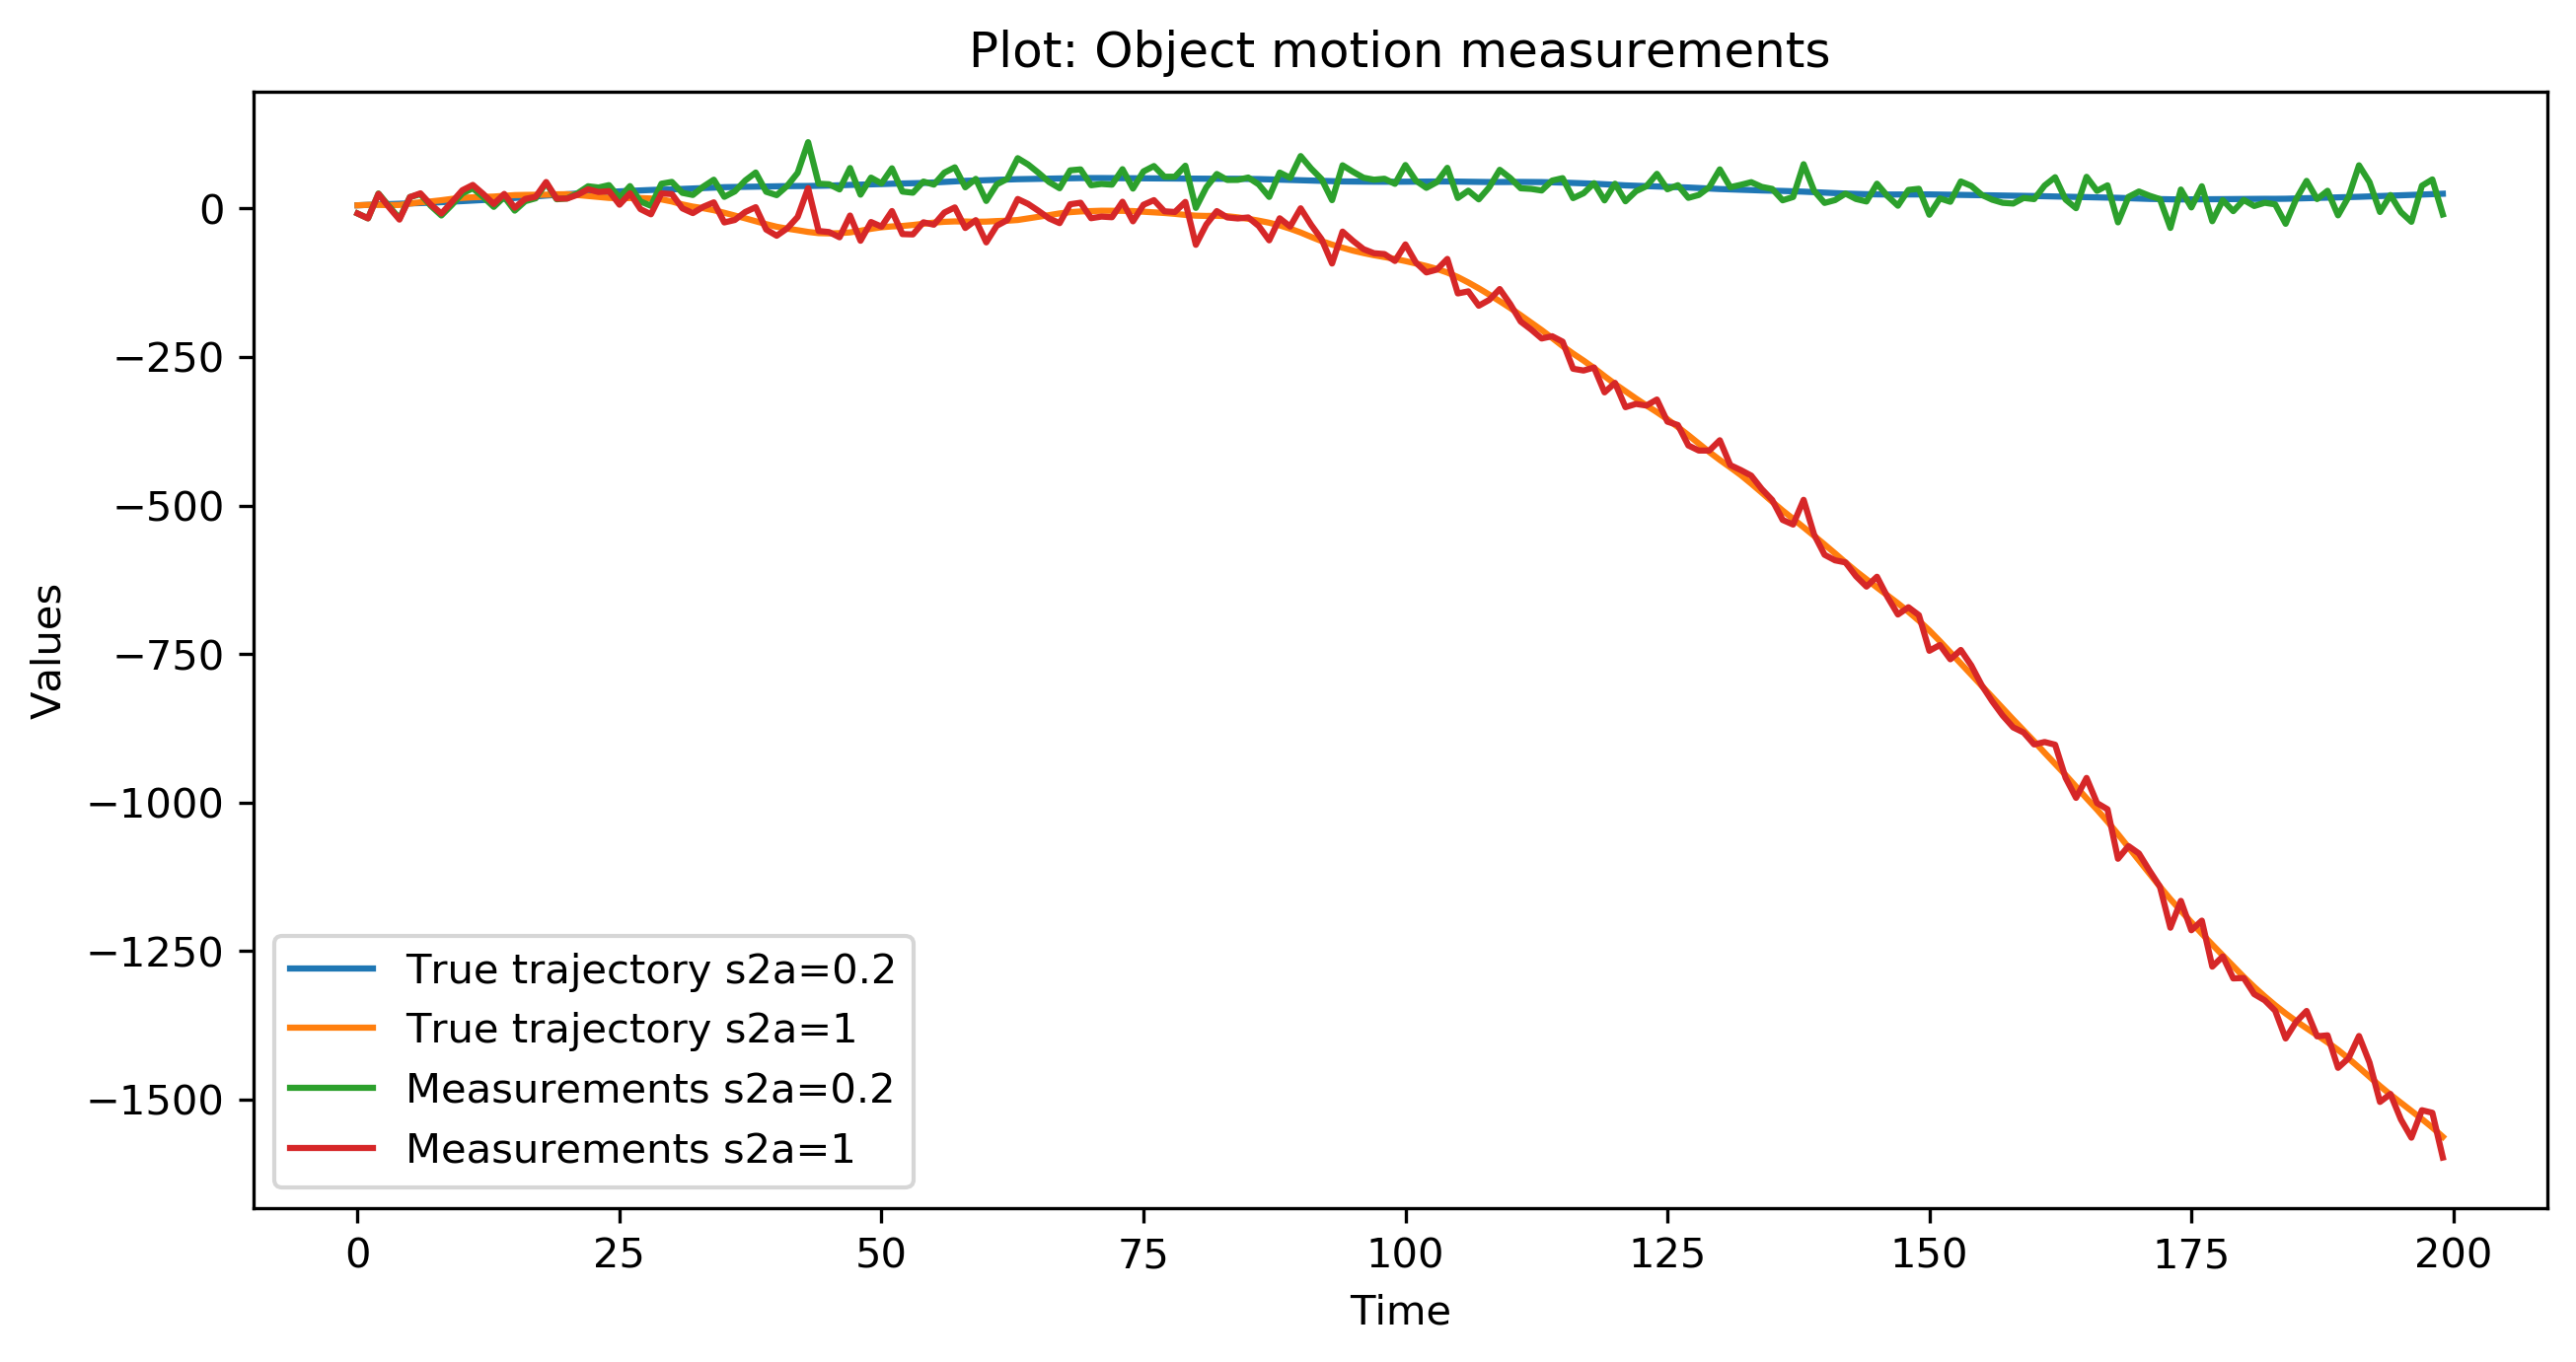

In [15]:
Z = np.zeros(c)
for i in range (c):
    Z[i] = H.dot(X[i])+n[i]
    
Z2 = np.zeros(c)
for i in range (c):
    Z2[i] = H.dot(X2[i])+n[i]
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Object motion measurements')    
plt.plot(X.T[0], label='True trajectory s2a=0.2')
plt.plot(X2.T[0], label='True trajectory s2a=1')
plt.plot(Z, label='Measurements s2a=0.2')
plt.plot(Z2, label='Measurements s2a=1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show() 

In [16]:
#4 Developing Kalman Filter
X0 = np.matrix((2,0))
P00 = np.matrix(((10000,0),(0,10000)))

#Covariance matrix Q
Q1 = np.matmul(G,G.T)*s2a
Q2 = np.matmul(G,G.T)*s2a2
R = s2n
I = np.matrix(((1,0),(0,1)))

#Kalman filtering
def kalman(x, Q):
    P = P00
    X_f = np.zeros([c,2])
    K_f = np.zeros([c,2])
    K_f[0] = (1,1)
    P_g = np.zeros(c)
    X_f[0] = X0
    for i in range (1,c):
        X_p = F.dot(np.asmatrix(X_f[i-1]).T)
        Pz = np.add(F.dot(P).dot(F.T),Q)
        frst = np.add(H.dot(Pz).dot(H.T),R)
        K = Pz.dot(H.T).dot(np.linalg.inv(frst))
        pre_scnd = np.subtract(x[i],H.dot(X_p))
        scnd = K.dot(pre_scnd)
        P = np.matmul(np.subtract(I,np.matmul(K,H)),Pz)
        X_f[i] = np.add(X_p,scnd).T
        K_f[i] = K.T
        P_g[i] = np.sqrt(P[0,0])
    #deleting first row
    K_f = np.delete(K_f, 0, 0)
    P_g = np.delete(P_g, 0, 0)
    return X_f.T, K_f.T[0], P_g
f, k, p = kalman(Z, Q1)
f2, k2, p2 = kalman(Z2, Q2)

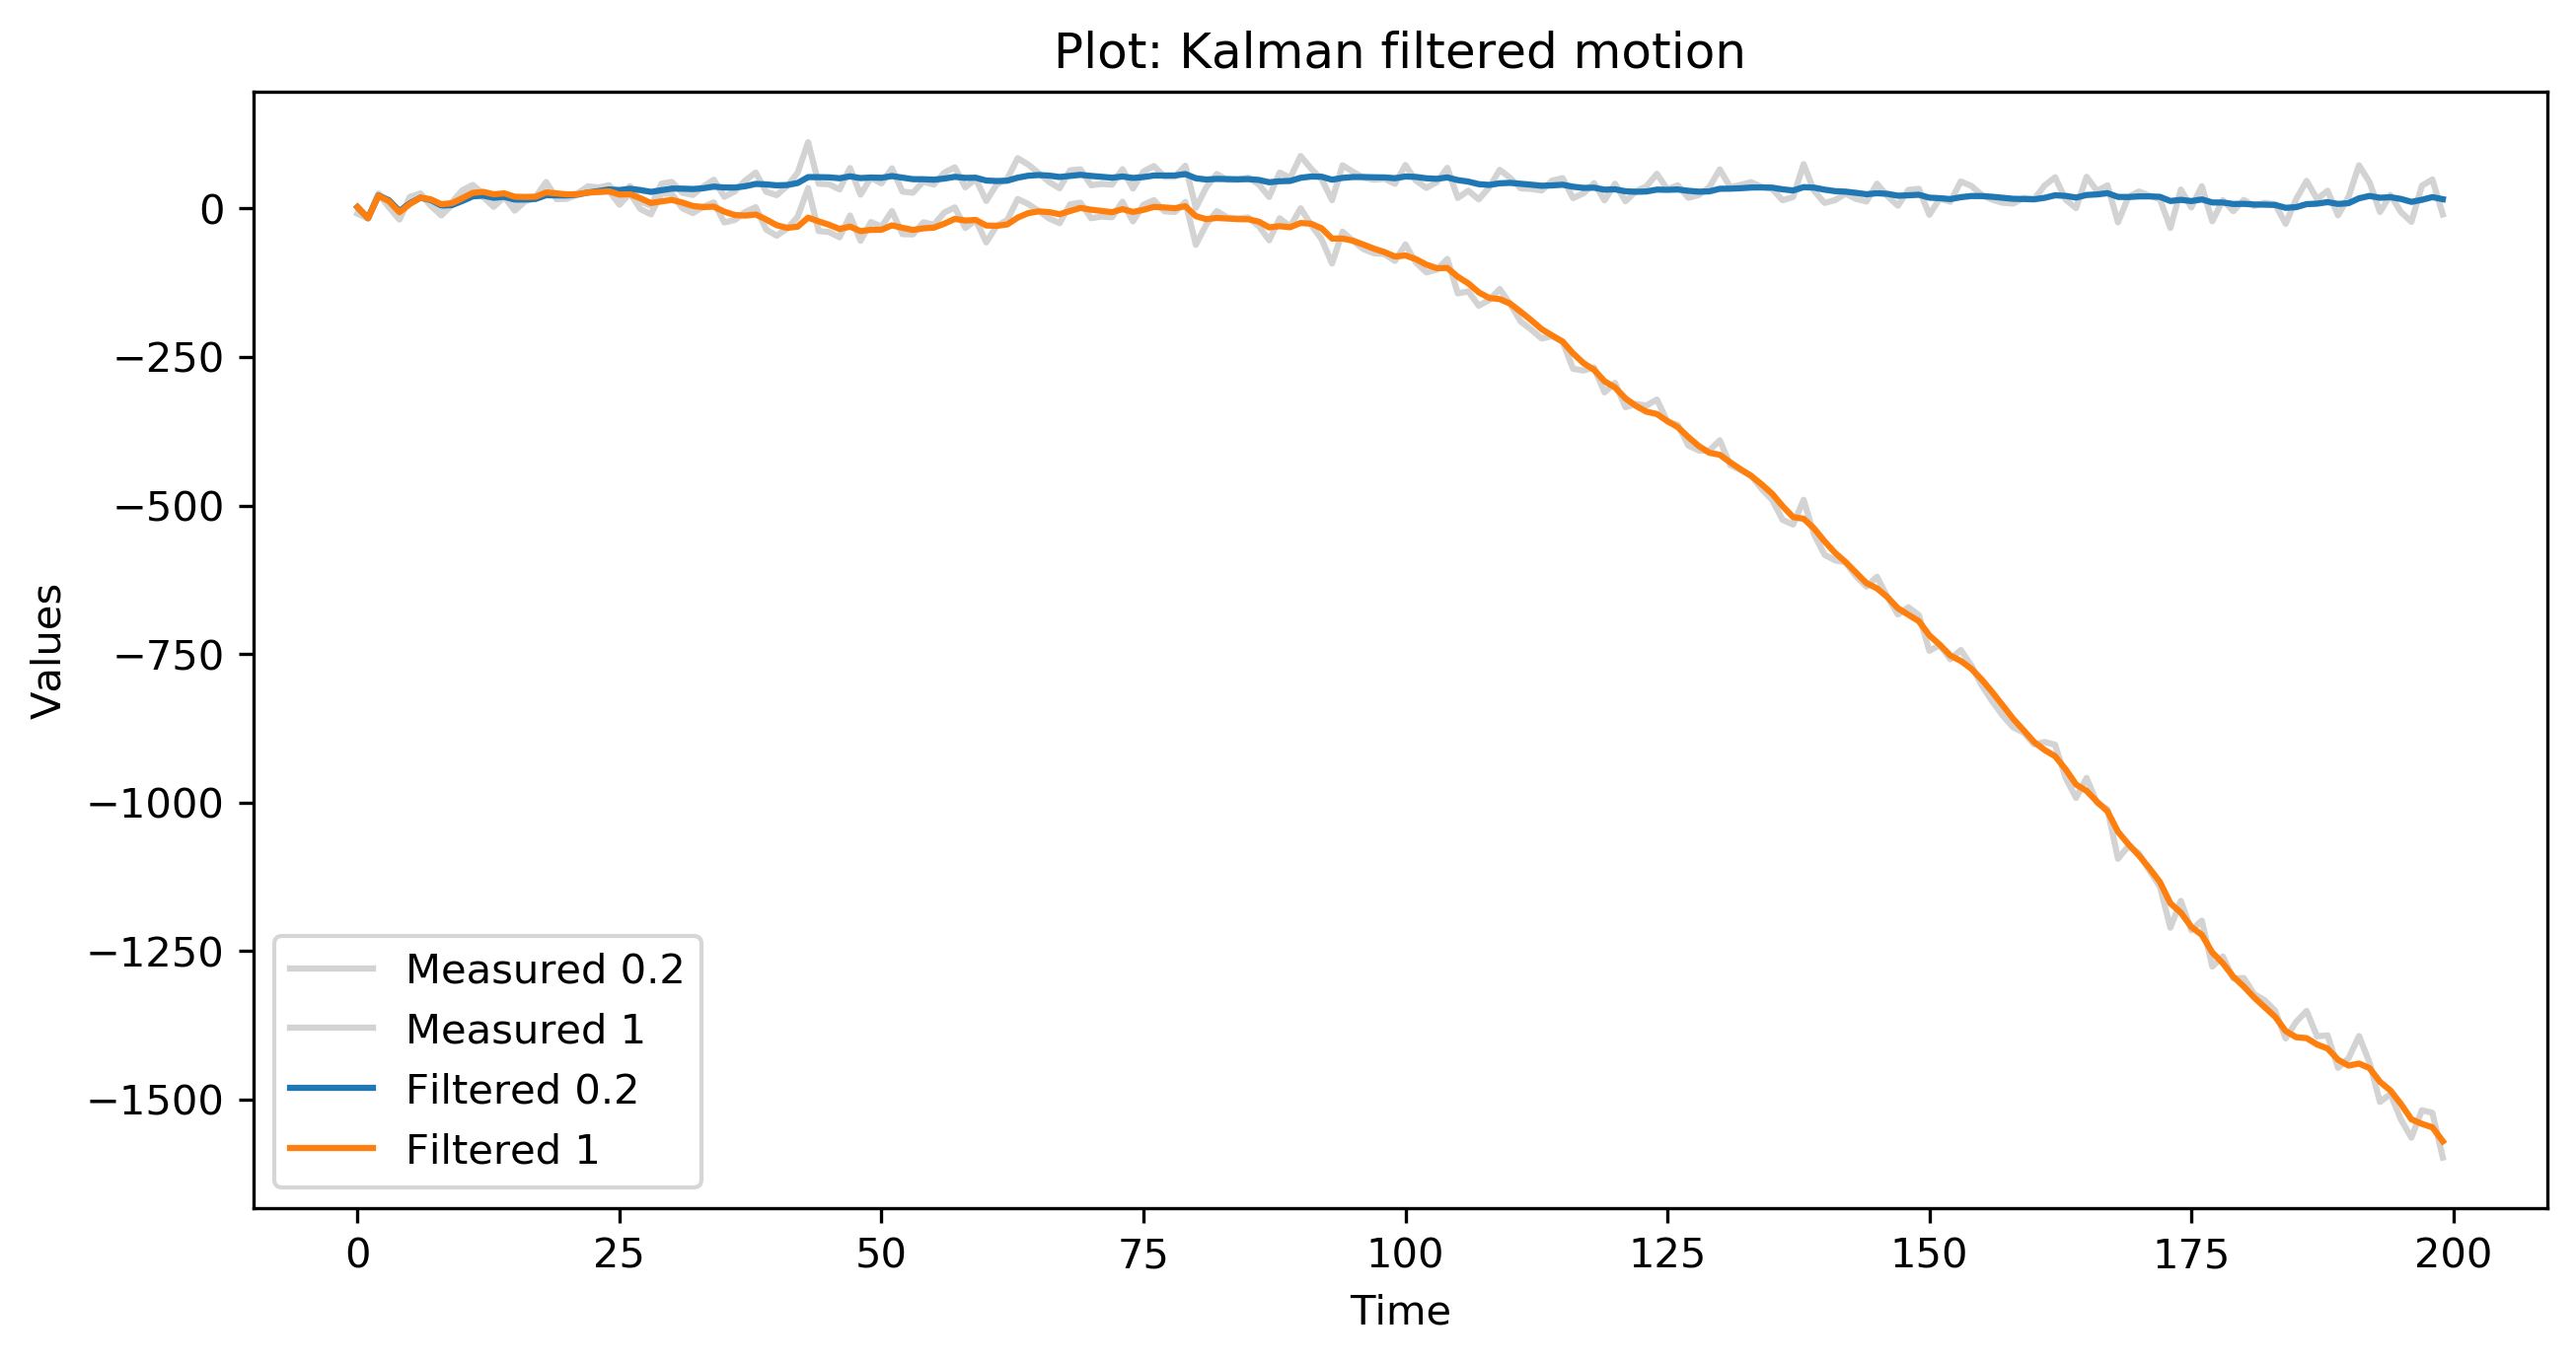

In [17]:
#5 Plotting the result
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Kalman filtered motion')
plt.plot(Z, label='Measured 0.2', c='lightgrey')
plt.plot(Z2, label='Measured 1', c='lightgrey')
plt.plot(f[0], label='Filtered 0.2')
plt.plot(f2[0], label='Filtered 1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

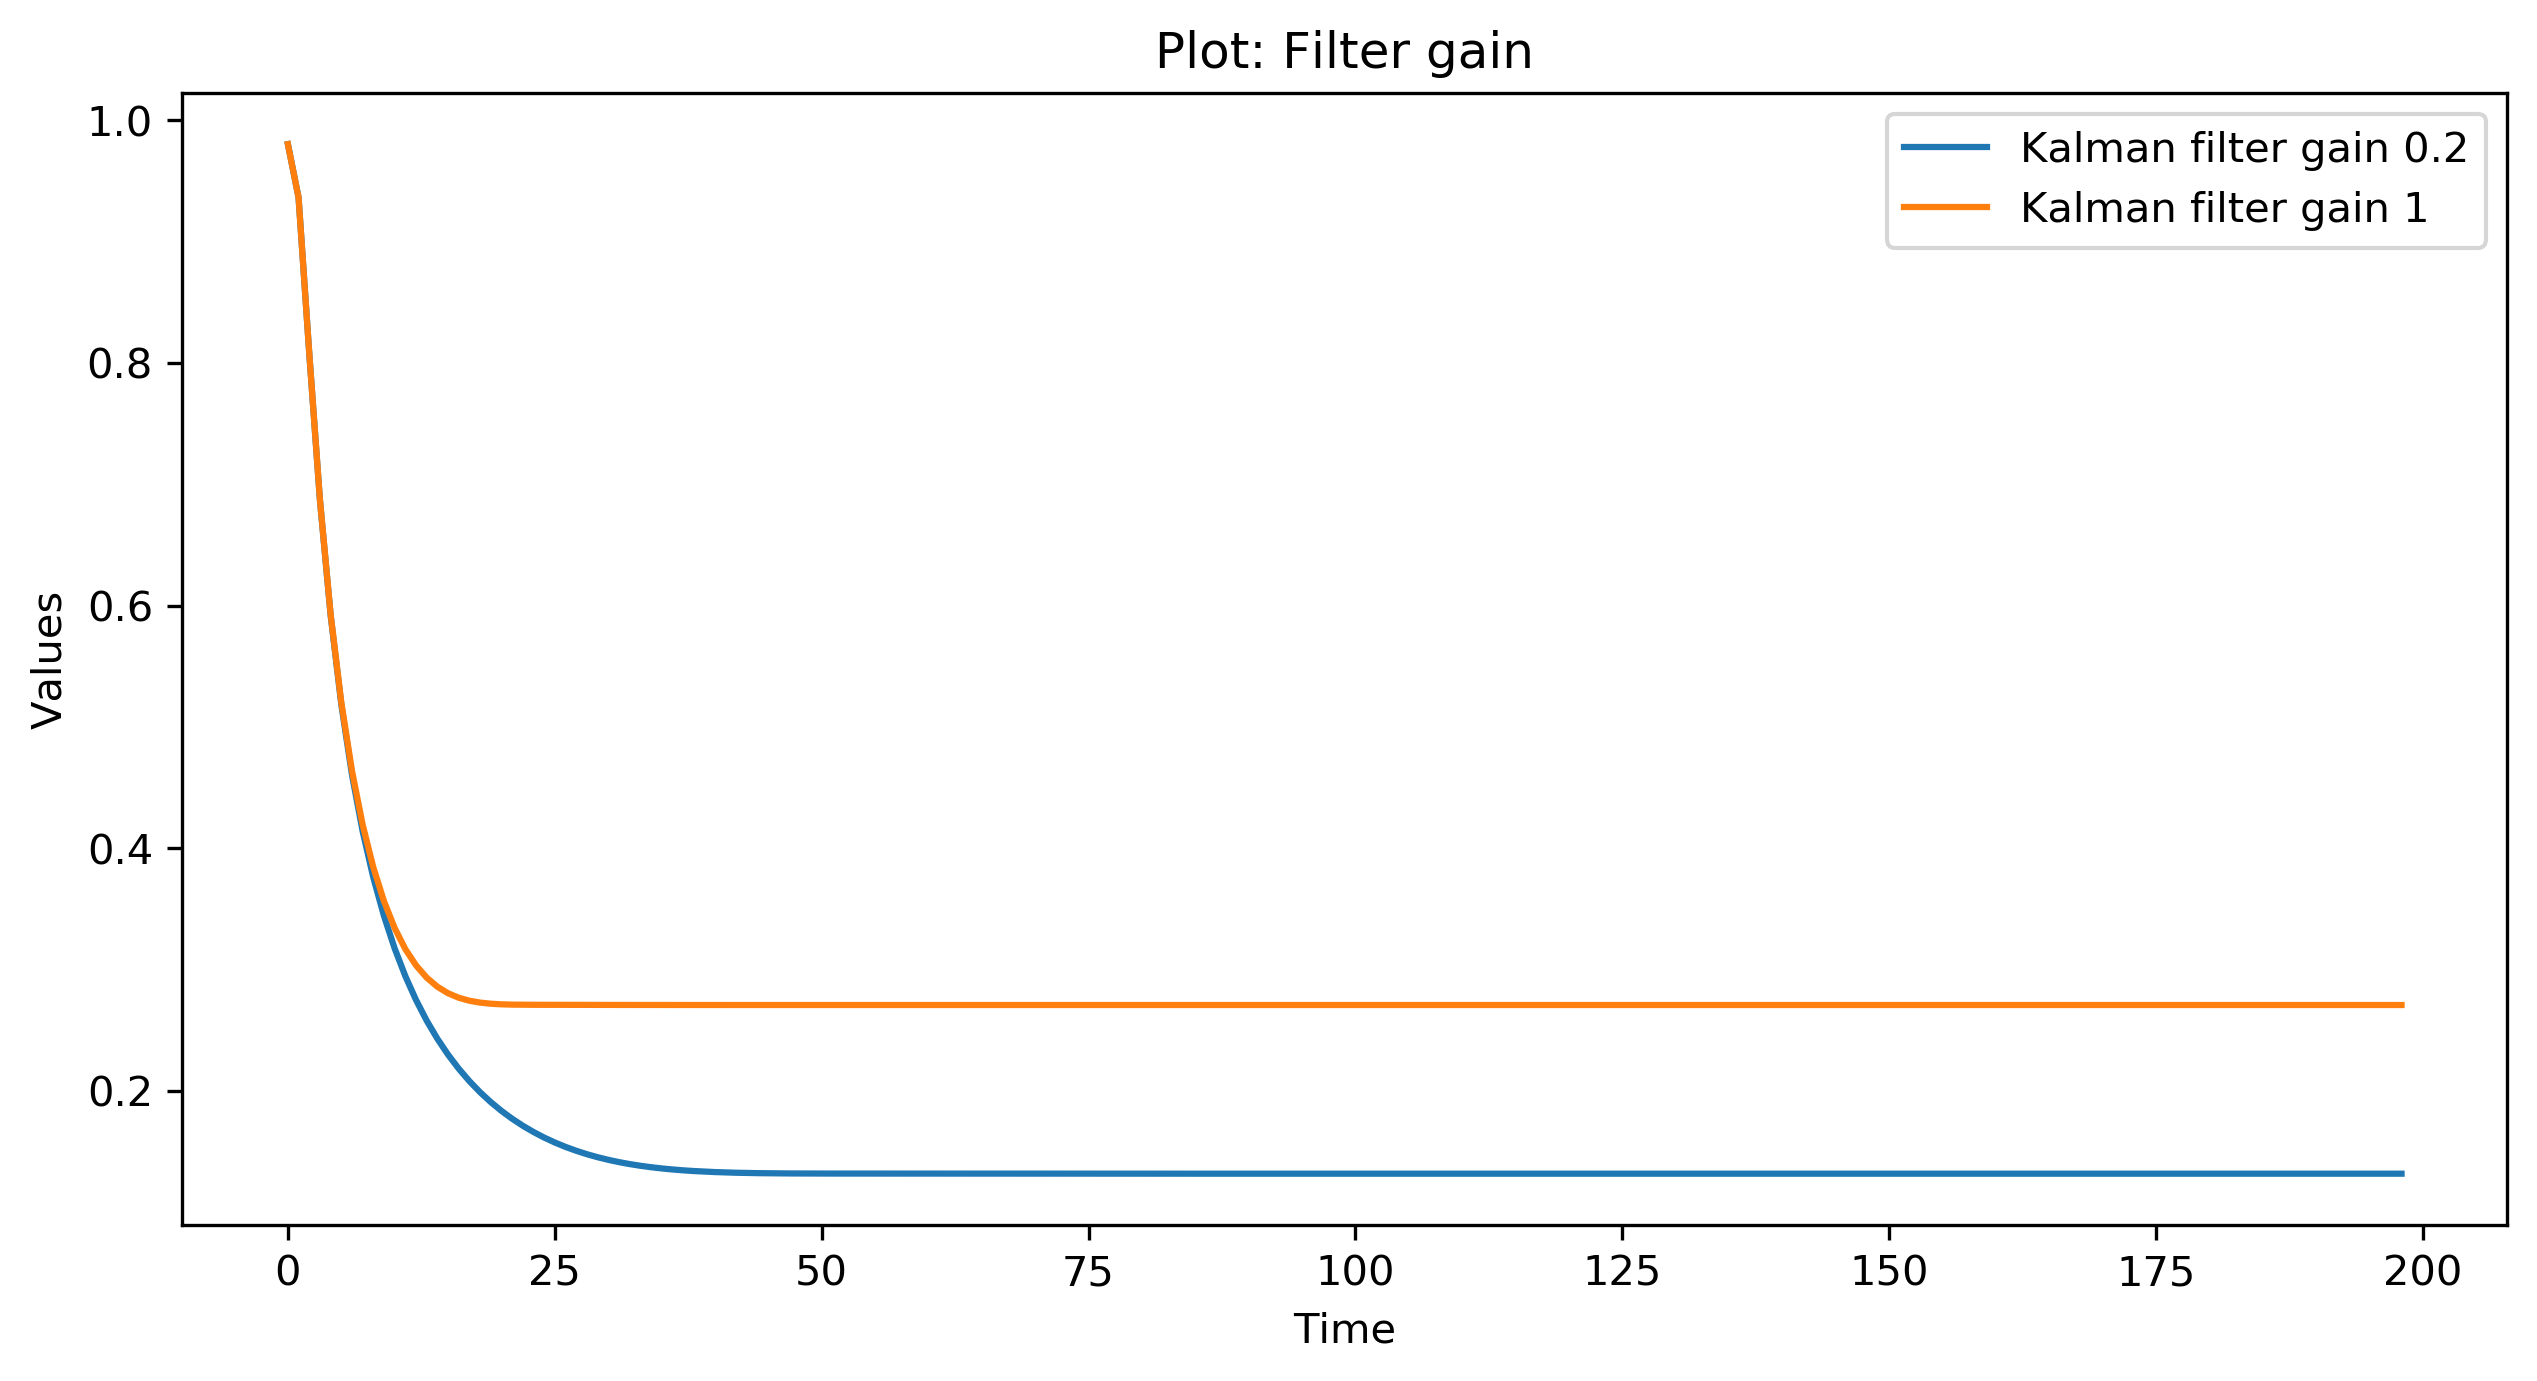

In [18]:
#6 Plot filter gain K
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Filter gain')    
plt.plot(k, label='Kalman filter gain 0.2')
plt.plot(k2, label='Kalman filter gain 1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

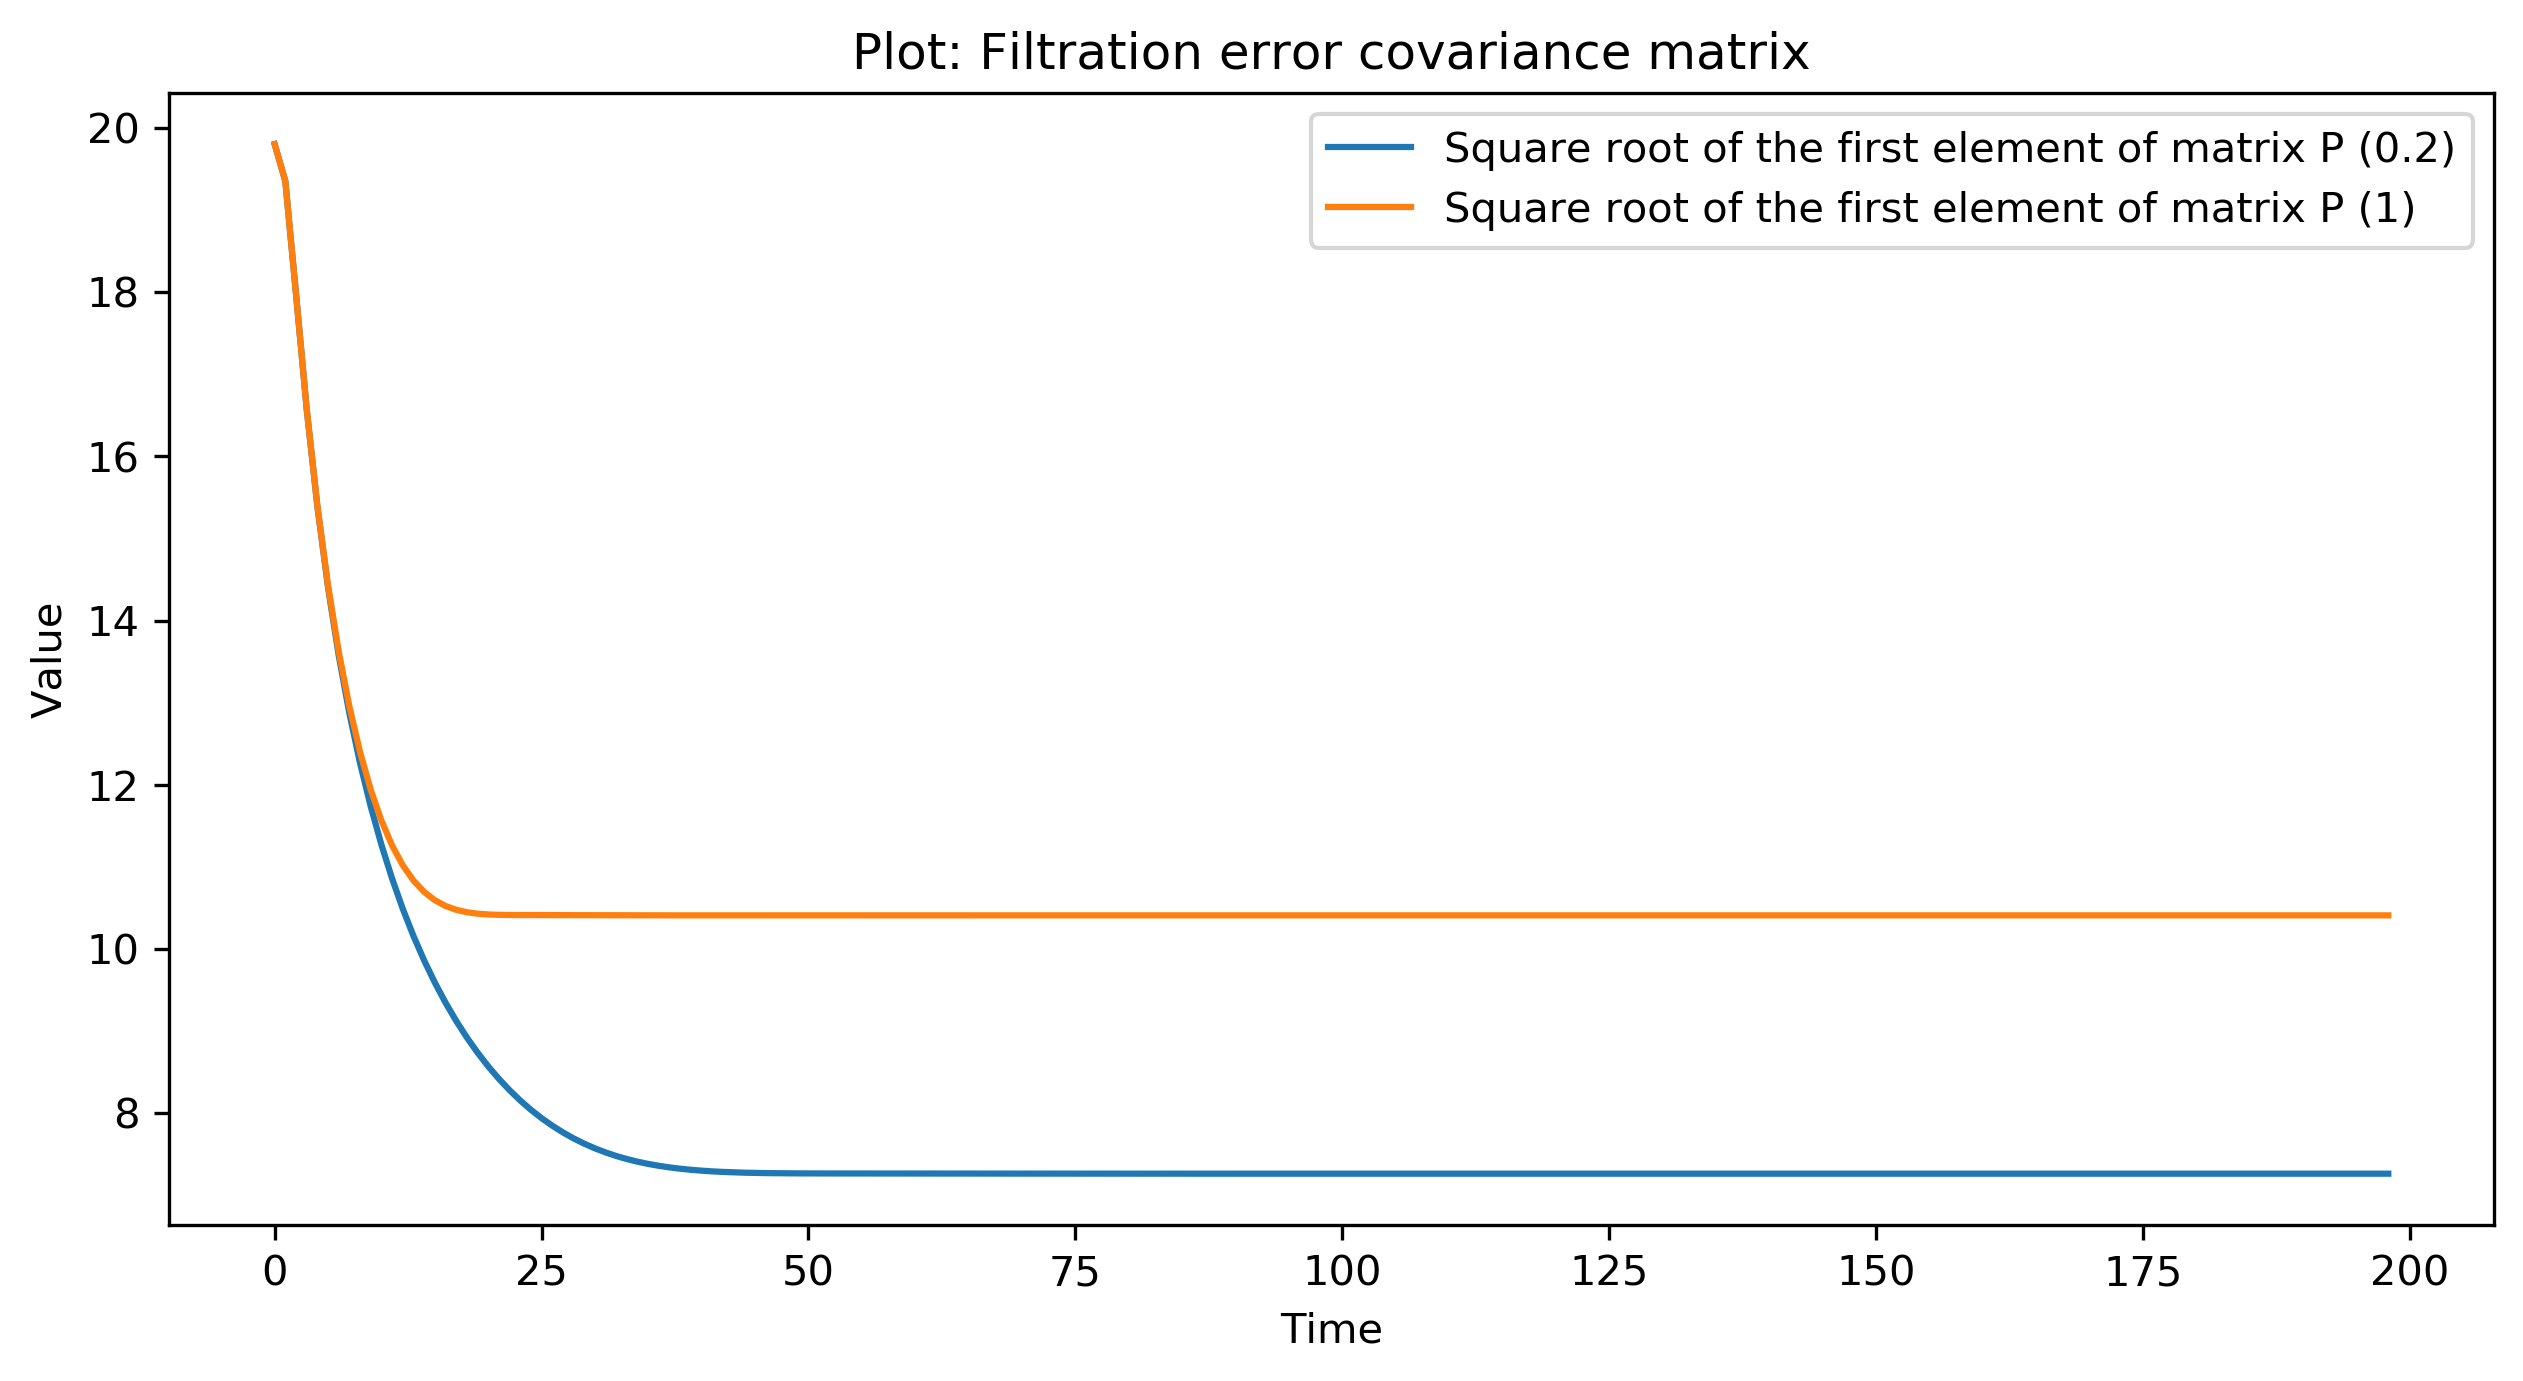

In [19]:
#P
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Filtration error covariance matrix')    
plt.plot(p, label='Square root of the first element of matrix P (0.2)')
plt.plot(p2, label='Square root of the first element of matrix P (1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()